<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_48_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación Automática de Frutas

## Contexto:

Eres parte de un equipo que desarrolla una app para supermercados inteligentes. Tu tarea es crear un clasificador automático de frutas basado en dos características: **peso (en gramos) y tamaño (en cm)**. El modelo debe aprender a distinguir entre Manzanas, Plátanos y Naranjas usando datos generados de forma simulada.



## Objetivo:

Construir una solución modular en Python que:

  + 1.- Genere datos aleatorios simulando las características físicas de frutas.
  + 2.- Entrene un clasificador K-Nearest Neighbors (KNN) con esos datos.
  + 3.- Permita predecir el tipo de fruta dados su peso y tamaño.
  + 4.- Muestre gráficamente los datos con colores distintos para cada fruta.



## 🔧 Especificaciones técnicas

### 1. Crear la clase **GeneradorFrutas**

  + Método: generar(self, num_muestras)

  + Debe generar num_muestras pares [peso, tamaño] y su respectiva etiqueta: "Manzana", "Plátano" o "Naranja".

  + Rango de valores por tipo:

    + Manzana: peso entre 120–200g, tamaño entre 7–9cm

    + Plátano: peso entre 100–150g, tamaño entre 12–20cm

    + Naranja: peso entre 150–250g, tamaño entre 8–12cm

<br>
<br>

### 2. Crear la clase **ClasificadorFrutas**

  + Entrena un modelo KNN y permite hacer predicciones:

    + Constructor con el parámetro k (número de vecinos).

    + Método: entrenar(X, y) → divide en entrenamiento/test y ajusta el modelo.

    + Método: evaluar() → imprime y retorna la precisión del modelo sobre el set de prueba.

    + Método: predecir(peso, tamaño) → retorna la fruta predicha como string.


<br>
<br>

### 3: Crear la clase **VisualizadorFrutas**

  + Método: graficar(self, X, y, titulo="Frutas") que grafique un scatter plot (matplotlib), con color distinto por clase.


<br>
<br>

### 4: Clase principal **SimuladorFrutas**

  + Método: ejecutar(self)

    + Genera 100 muestras con GeneradorFrutas
    + Entrena el modelo con ClasificadorFrutas
    + Predice el tipo de fruta para una muestra nueva: peso 140g y tamaño 18cm
    + Imprime la predicción.
    + Muestra un gráfico de las frutas generadas.

<br>
<br>

##✅ Ejemplo de uso
```python
simulador = SimuladorFrutas()
simulador.ejecutar()
```

## Salida esperada
```python
🔍 Precisión del modelo: 90.00%
🍎 La fruta predicha para peso=140g y tamaño=18cm es: Plátano
```

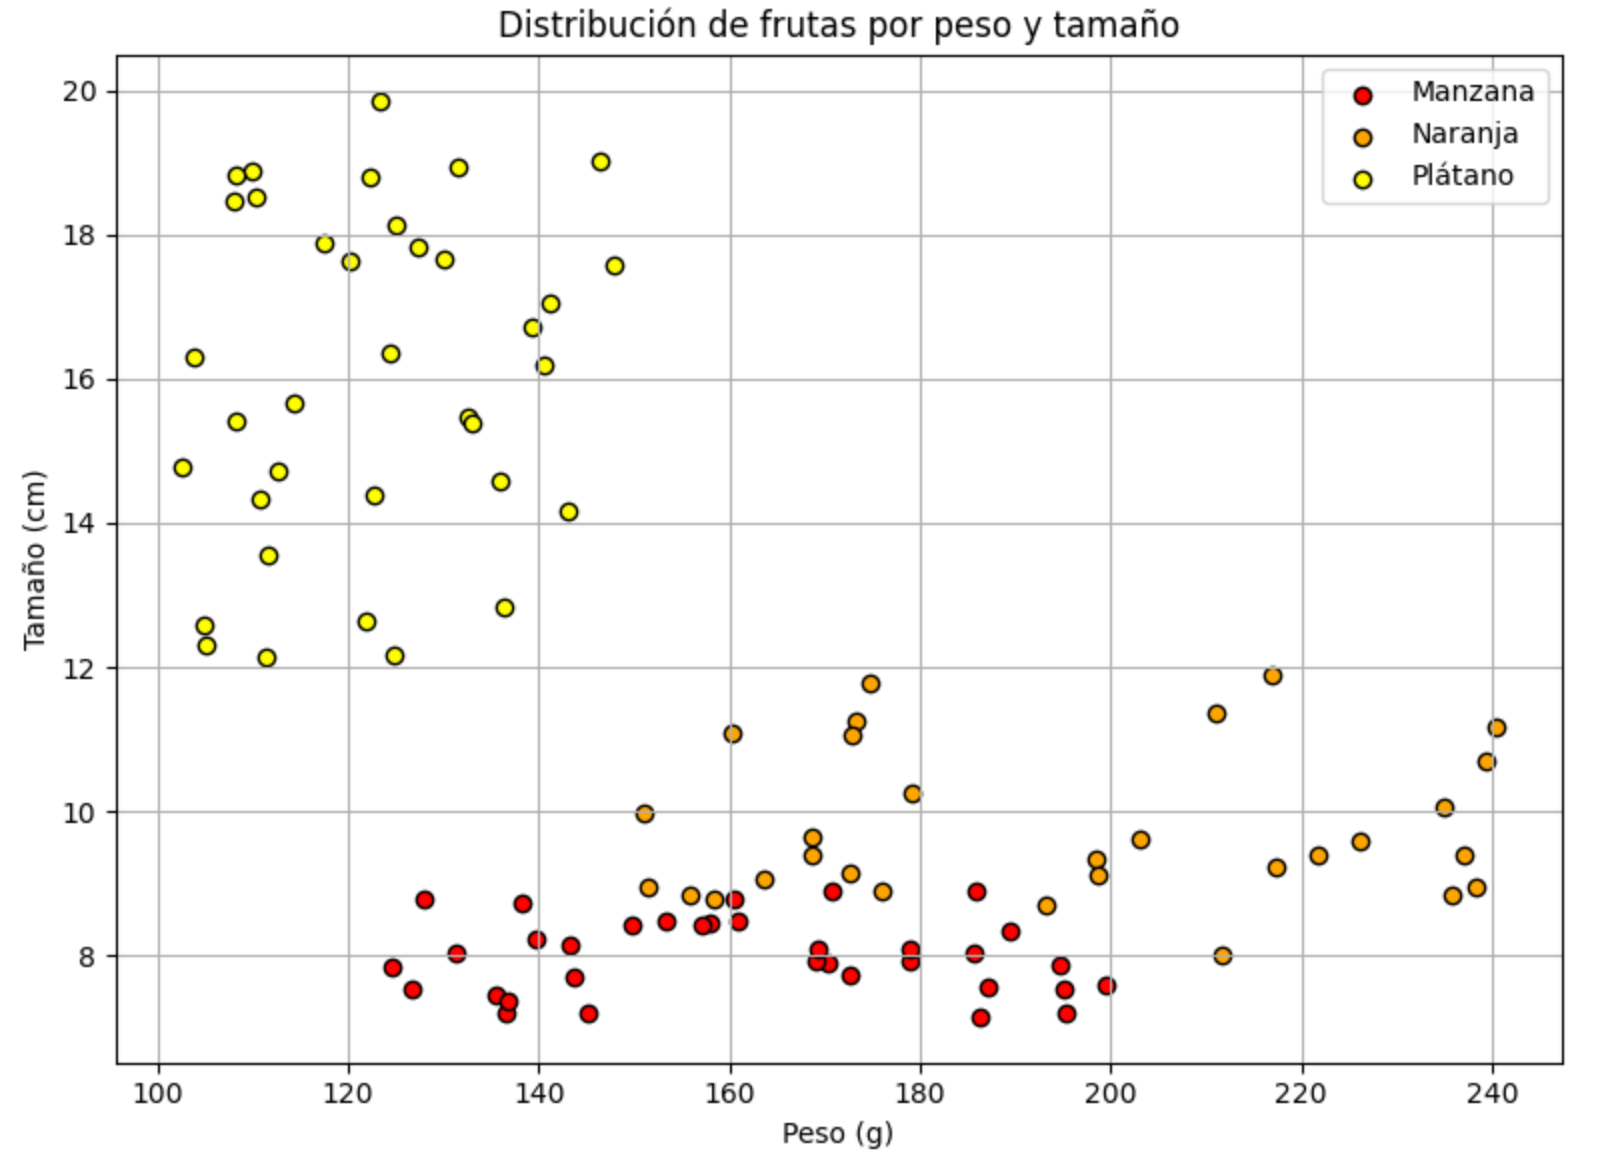

## Importación de librerías

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Definición de la clase GeneradorFrutas

In [167]:
class GeneradorFrutas:
    """
    Clase para generar datos simulados de frutas (peso y tamaño).

    Genera pares [peso, tamaño] y su respectiva etiqueta ('Manzana',
    'Plátano', 'Naranja') basados en rangos predefinidos. El muestreo
    de frutas es uniforme con reemplazo.
    """
    def __init__(self):
        self.muestras = None
        self.frutas = []
        self.etique = []
    def generar(self, num_muestras):
        """
        Genera un conjunto de muestras de frutas con sus características.

        Args:
            num_muestras (int): El número de muestras de frutas a generar.

        Returns:
            list: Una lista de listas, donde cada sublista contiene [peso,
                  tamaño, fruta].
        """
        self.muestras = num_muestras
        np.random.seed(42)

        # Defino los rangos de valores de las frutas
        rangos ={'Manzana':[120, 200,  7,  9],\
             'Plátano':[100, 150, 12, 20], \
             'Naranja':[150, 250,  8, 12]}
        min_peso, max_peso, min_tama, max_tama = (0,1,2,3)
        las_frutas = list(rangos.keys())

        for _ in range(self.muestras):
            # La probabilidad de cada fruta debe ser la misma
            fruta = np.random.choice(las_frutas, p=[1/3, 1/3, 1/3])
            self.etique.append(fruta)
            # genero los pesos y los tamaños según sea la fruta
            peso = np.random.uniform(rangos[fruta][min_peso], rangos[fruta][max_peso])
            tama = np.random.uniform(rangos[fruta][min_tama], rangos[fruta][max_tama])
            self.frutas.append([peso, tama])
        return np.array(self.frutas), np.array(self.etique)

In [168]:
gf = GeneradorFrutas()
X, y  = gf.generar(1000)
frutas_df = pd.DataFrame(X, columns=['Peso', 'Tamaño'])
frutas_df['Fruta'] = y
frutas_df.head()

,Peso,Tamaño,Fruta
0,147.535715,17.855952,Plátano
1,107.800932,13.247956,Plátano
2,189.294092,8.202230,Manzana
3,152.058449,11.879639,Naranja
4,171.233911,8.727300,Naranja


In [169]:
frutas_df.head()

,Peso,Tamaño,Fruta
0,147.535715,17.855952,Plátano
1,107.800932,13.247956,Plátano
2,189.294092,8.202230,Manzana
3,152.058449,11.879639,Naranja
4,171.233911,8.727300,Naranja


## Definición de la clase ClasificadorFrutas

In [170]:
class ClasificadorFrutas:
  def __init__(self, k=3):
    self.k = k
    self.modelo = None
    self.X_train = None
    self.y_train = None
    self.X_test = None
    self.y_test = None
    self.y_pred = None

  def entrenar(self, X, y):
    if self.modelo is None:
      y['Codigos'] = y['Fruta'].map({'Manzana': 0, 'Plátano': 1, 'Naranja': 2})
      self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y['Codigos'], test_size=0.2, random_state=42)
      self.modelo = KNeighborsClassifier(n_neighbors=self.k)
      self.modelo.fit(self.X_train, self.y_train)
      self.y_pred = self.modelo.predict(self.X_test)
    else:
      print("El modelo ya está entrenado.")

  def predecir(self, peso, tam):
    if self.modelo is not None:
      X_test = pd.DataFrame([[peso, tam]], columns=['Peso', 'Tamaño'])
      y_pred = self.modelo.predict(X_test)
      return y_pred
    else:
      print("El modelo no está entrenado.")

  def evaluar(self):
    if self.modelo is not None:

      accuracy = accuracy_score(self.y_test, self.y_pred)
      print(f"Precisión del modelo: {accuracy:6.2f} %")
    else:
      print("El modelo no está entrenado.")



## Definición de la clase VisualizadorFrutas

In [171]:
"""
class VisualizadorFrutas:
  def __init__(self):
    self.frutas = None
  def graficar(self, X, y, titulo="Frutas"):
    plt.scatter(X['Peso'], X['Tamaño'], c=y.map({'Manzana': 0, 'Plátano': 1, 'Naranja': 2}))
    plt.xlabel('Peso (g)')
    plt.ylabel('Tamaño (cm)')
    plt.title(titulo)
    plt.show()
"""
class VisualizadorFrutas:
    """Genera visualizaciones para los datos de frutas."""

    def graficar_datos(self, X, y, titulo):

        colores = {'Manzana': 'red', 'Plátano': 'yellow', 'Naranja': 'orange'}
        plt.figure(figsize=(8, 6))

        scatters = []
        for f_nom, f_col in colores.items():
            print(f"f_nom: {f_nom}, f_col: {f_col}")

            # Para filtrar las filas de un array NumPy y basado en el valor de
            # una columna específica, puedes usar indexación booleana.

            # np.where() devuelve una tupla de arrays, uno por cada dimensión
            # del array original. Como y es 1D, devuelve una tupla con un solo
            # array de índices. [0] accede a este primer (y único) array de índices.

            indices =  np.where(y == f_nom)[0]
            X_filtrado = X[indices]
            scatter = plt.scatter( X[indices, 0], X[indices, 1], label=f_nom, color=f_col, edgecolors=f_col )
            scatters.append(scatter)


        plt.xlabel("Peso (g)")
        plt.ylabel("Tamaño (cm)")
        plt.title(titulo)
        plt.legend()
        plt.grid(True, alpha=0.2)
        plt.tight_layout()
        plt.show()

## Definición de la clase SimuladorFrutas

In [172]:
class SimuladorFrutas:
  def __init__(self):
    self.frutas = None
    self.etique = None
    self.generador = GeneradorFrutas()
    self.modelo = ClasificadorFrutas()
    self.VisualizadorFrutas = VisualizadorFrutas()
  def ejecutar(self):
    self.frutas, self.etique = gf.generar(100)
    frutas_df = pd.DataFrame(self.frutas, columns=['Peso', 'Tamaño'])
    etique_df = pd.DataFrame(self.etique, columns=['Fruta'])
    self.modelo.entrenar(frutas_df, etique_df)
    self.modelo.evaluar()
    peso_nuevo, tam_nuevo = 140, 18

    fruta_nueva_pred = self.modelo.predecir(peso_nuevo, tam_nuevo)
    print(f"La fruta predicha para peso={peso_nuevo}g y tamaño={tam_nuevo} cm: {fruta_nueva_pred[0]}")

    self.VisualizadorFrutas.graficar_datos(self.frutas, self.etique, "Distribución de frutas por pesos y tamaños")


Precisión del modelo:   0.95 %
La fruta predicha para peso=140g y tamaño=18 cm: 1
f_nom: Manzana, f_col: red
f_nom: Plátano, f_col: yellow
f_nom: Naranja, f_col: orange


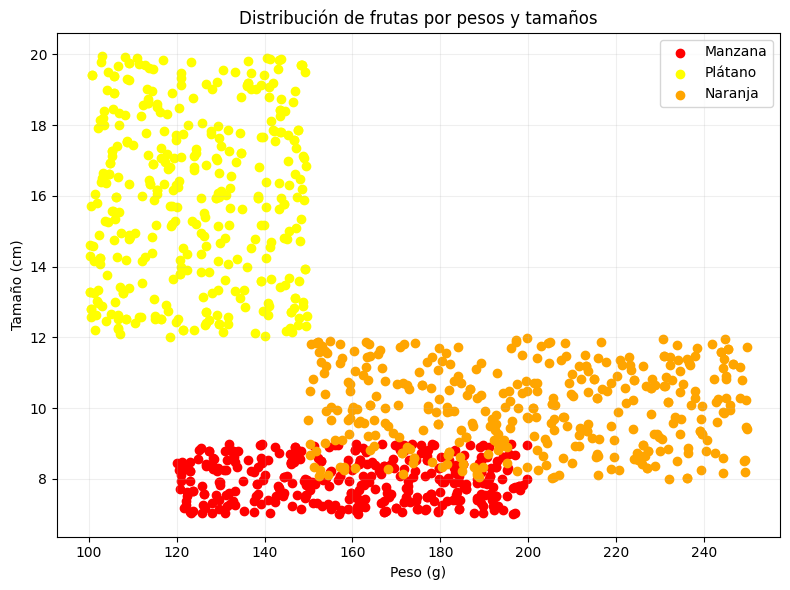

In [173]:
sf = SimuladorFrutas()
sf.ejecutar()
#

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


def generar_datos_compras(num_muestras):
    # Generar datos aleatorios
    num_paginas_visitadas = np.random.randint(1, 21, num_muestras)
    tiempo_en_sitio = np.random.randint(1, 31, num_muestras)

    # El operador & realiza una operación AND lógica elemento por elemento entre los dos arrays.
    etiquetas = ( ( 5 < num_paginas_visitadas ) & ( 10 < tiempo_en_sitio ) ).astype(int)
    X = np.column_stack((num_paginas_visitadas, tiempo_en_sitio))
    y = etiquetas
    return X, y

def graficar_datos(X, y):
    plt.figure(figsize=(8, 6))
    colores = {0: ['red', 'No compra'], 1:['green', 'Compra']}
    y_colores = [colores[label][0] for label in y]
    y_etiquet = [colores[label][1] for label in y]

     # Crear handles separados para cada categoría de leyenda
    scatter_si = plt.scatter(X[ y == 1, 0], X[ y == 1, 1], c='green', label='Compra', edgecolors='green')
    scatter_no = plt.scatter(X[ y == 0, 0], X[ y == 0, 1], c='red',   label='No compra', edgecolors='red')

    #plt.scatter(X[:, 0], X[:, 1], c=y_colores, edgecolors=y_colores)
    plt.xlabel('Número de páginas visitadas')
    plt.ylabel('Tiempo en el sitio (minutos)')
    plt.title('Comportamiento de usuarios y decisión de compra')

    #plt.legend(handles=[scatter_si, scatter_no], loc='upper left', bbox_to_anchor=(1, 1))
    #plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # Leyenda fuera
    plt.legend(loc='upper left') # Leyenda dentro
    plt.grid(True, alpha=0.05)
    plt.tight_layout()
    plt.show()

def entrenar_modelo(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  modelo = LogisticRegression()
  modelo.fit(X_train, y_train)
  return modelo

def predecir_compra(modelo, num_paginas_visitadas, tiempo_en_sitio):
      y_pred = modelo.predict([[num_paginas_visitadas, tiempo_en_sitio]])
      if y_pred == 1:
        return(f"El usuario comprará el producto.")
      else:
        return(f"El usuario no comprará el producto.")



def evaluar_modelo(modelo,  X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Este método score(X, y) es una forma conveniente de evaluar el rendimiento
  # del modelo entrenado. Calcula la precisión (accuracy) del modelo para un
  #conjunto de datos de entrada X y las etiquetas correspondientes y.
  precision = modelo.score(X_test, y_test)
  print(f"Precisión del modelo: {precision:6.2f} %")
  print(f"Precisión en el conjunto de prueba:  {precision:6.2f} %")
  return precision

def graficar_funcion_prediccion(modelo):
      num_paginas_visitadas = np.linspace(1, 20, 100)
      tiempo_en_sitio = np.linspace(1, 30, 100)
      X = np.column_stack((num_paginas_visitadas, tiempo_en_sitio))
      y_pred = modelo.predict_proba(X)[:, 1]

      plt.figure(figsize=(8, 6))
      plt.plot(X[:, 0], y_pred, color='green', linewidth=2)
      plt.xlabel('Número de páginas visitadas')
      plt.ylabel('Probabilidad de compra')